**Exercise 3**
by Sören Krüger, Leon Happ and Schant Demircian

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
data = digits['data']
images = digits['images']
target = digits['target']
target_names = digits['target_names']

In [3]:
def fit_qda(training_features, training_labels):
    '''fit qda and return mu, covmat and p'''
    N = len(training_labels)
    all_labels = np.sort(np.unique(training_labels))
    
    mu = np.array([np.mean(training_features[training_labels==x],
                                    axis=0) for x in all_labels]).T
    
    covmat = np.array([np.cov(training_features[training_labels==x].T
                             ) for x in all_labels]).T
    
    p = np.array([N/np.sum(training_labels==x) for x in all_labels])
    
    return mu, covmat, p

In [4]:
mu, cov, p = fit_qda(data, target)

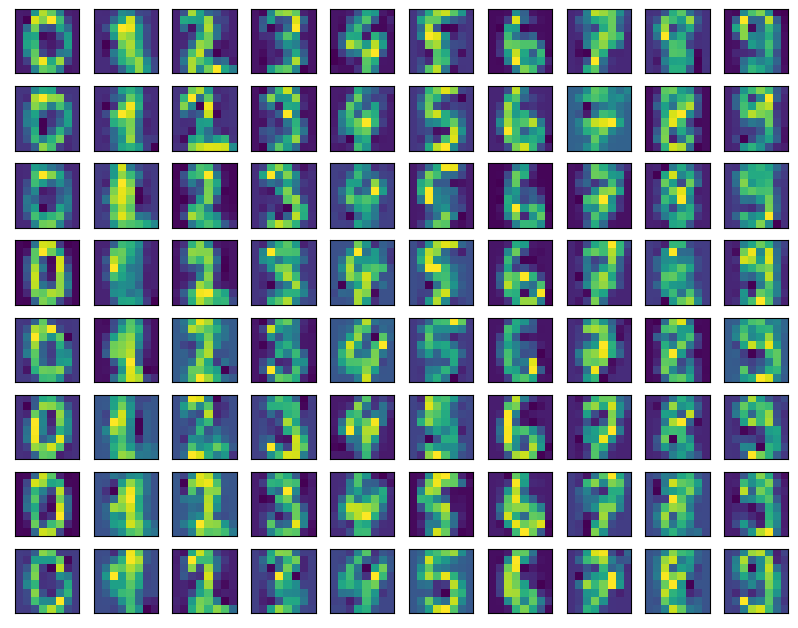

In [5]:
fig, axs = plt.subplots(8, 10, dpi=100, figsize=(10,8))
for i in range(10):
    for j in range(8):
        axs[j, i].imshow(np.random.multivariate_normal(mu[:,i], cov[:,:,i]).reshape(8,8))
        axs[j, i].axes.get_xaxis().set_visible(False)
        axs[j, i].axes.get_yaxis().set_visible(False)
        
plt.show()

Most digits are clearly visible most. Some digits work better than others (e.g. 8 doesn't look great). Also, computation time is pretty long.